# Assignment 4

---

LeBron James is one of the most popular sports figure in the world and is regarded as one of the All-Time Greats in NBA History. He puts on a show every game contributing to the game with points, rebounds, assists, and etc., and when the money is on the line, and during high-leverage moments especially during the playoffs, sports analysts and fans describes another level of LeBron's game called the Playoff Lebron. In this assignment, I will try to find out whether or not there really is another level that is Playoff LeBron or his greatness from the regular season just translates into the playoffs nothing more nothing less. In order to answer the question, "Is Playoff LeBron real?", I will try to compare and find if there is a significant difference between LeBron's regular season PER and playoffs PER. Player Efficiency Rating or PER is one of the stats that measures the overall performance of a player considering the positive and negative attributes as well as the team and league stats. The computation of PER based on ESPN's John Hollinger consider's league and team stats and for the sake of simplicity I will use a simplified computation of PER using [Zach Fein's formula](https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess) which involved linear weights. The result will be different from the PER stat recorded in ESPN but it will be close. 

The dataset to be used in this assignment involves LeBron's regular season and playoff stats from 2006-2018 where he made it into his consecutive playoff appearances. 

---

# Step 1 : Data Preprocessing

In [152]:
import pandas as pd

regular_season_stats = []
# Clean Data
regular_season_2005_2006 = pd.read_csv('./dataset/lebron-james/season/2005-2006.csv')
regular_season_2005_2006.dtypes
regular_season_2005_2006 = regular_season_2005_2006[~(regular_season_2005_2006['PTS'] == 'Inactive')]
regular_season_stats.append(regular_season_2005_2006)

regular_season_2006_2007 = pd.read_csv('./dataset/lebron-james/season/2006-2007.csv')
regular_season_2006_2007 = regular_season_2006_2007[~(regular_season_2006_2007['PTS'] == 'Inactive')]
regular_season_stats.append(regular_season_2006_2007)

regular_season_2007_2008 = pd.read_csv('./dataset/lebron-james/season/2007-2008.csv')
regular_season_2007_2008 = regular_season_2007_2008[~(regular_season_2007_2008['PTS'] == 'Inactive')]
regular_season_2007_2008 = regular_season_2007_2008[~(regular_season_2007_2008['PTS'] == 'Did Not Dress')]
regular_season_stats.append(regular_season_2007_2008)

regular_season_2008_2009 = pd.read_csv('./dataset/lebron-james/season/2008-2009.csv')
regular_season_2008_2009 = regular_season_2008_2009[~((regular_season_2008_2009['PTS'] == 'Inactive') | (regular_season_2008_2009['PTS'] == 'Did Not Dress'))]
regular_season_stats.append(regular_season_2008_2009)

regular_season_2009_2010 = pd.read_csv('./dataset/lebron-james/season/2009-2010.csv')
regular_season_2009_2010 = regular_season_2009_2010[~((regular_season_2009_2010['PTS'] == 'Inactive') | (regular_season_2009_2010['PTS'] == 'Did Not Dress'))]
regular_season_stats.append(regular_season_2009_2010)

regular_season_2010_2011 = pd.read_csv('./dataset/lebron-james/season/2010-2011.csv')
regular_season_2010_2011 = regular_season_2010_2011[~((regular_season_2010_2011['PTS'] == 'Inactive') | (regular_season_2010_2011['PTS'] == 'Did Not Dress') | (regular_season_2010_2011['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2010_2011)

regular_season_2011_2012 = pd.read_csv('./dataset/lebron-james/season/2011-2012.csv')
regular_season_2011_2012 = regular_season_2011_2012[~((regular_season_2011_2012['PTS'] == 'Inactive') | (regular_season_2011_2012['PTS'] == 'Did Not Dress') | (regular_season_2011_2012['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2011_2012)

regular_season_2012_2013 = pd.read_csv('./dataset/lebron-james/season/2012-2013.csv')
regular_season_2012_2013 = regular_season_2012_2013[~((regular_season_2012_2013['PTS'] == 'Inactive') | (regular_season_2012_2013['PTS'] == 'Did Not Dress') | (regular_season_2012_2013['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2012_2013)

regular_season_2013_2014 = pd.read_csv('./dataset/lebron-james/season/2013-2014.csv')
regular_season_2013_2014 = regular_season_2013_2014[~((regular_season_2013_2014['PTS'] == 'Inactive') | (regular_season_2013_2014['PTS'] == 'Did Not Dress') | (regular_season_2013_2014['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2013_2014)

regular_season_2014_2015 = pd.read_csv('./dataset/lebron-james/season/2014-2015.csv')
regular_season_2014_2015 = regular_season_2014_2015[~((regular_season_2014_2015['PTS'] == 'Inactive') | (regular_season_2014_2015['PTS'] == 'Did Not Dress') | (regular_season_2014_2015['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2014_2015)

regular_season_2015_2016 = pd.read_csv('./dataset/lebron-james/season/2015-2016.csv')
regular_season_2015_2016 = regular_season_2015_2016[~((regular_season_2015_2016['PTS'] == 'Inactive') | (regular_season_2015_2016['PTS'] == 'Did Not Dress') | (regular_season_2015_2016['PTS'] == 'Did Not Play'))]
regular_season_stats.append(regular_season_2015_2016)

regular_season_2016_2017 = pd.read_csv('./dataset/lebron-james/season/2016-2017.csv')
regular_season_2016_2017 = regular_season_2016_2017[~((regular_season_2016_2017['PTS'] == 'Inactive') | (regular_season_2016_2017['PTS'] == 'Did Not Dress') | (regular_season_2016_2017['PTS'] == 'Did Not Play') | (regular_season_2016_2017['PTS'] == 'Not With Team'))]
regular_season_stats.append(regular_season_2016_2017)

regular_season_2017_2018 = pd.read_csv('./dataset/lebron-james/season/2017-2018.csv')
regular_season_stats.append(regular_season_2017_2018)

len(regular_season_stats)

13

In [153]:
regular_season_stats[0].head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2005-11-02,20-307,CLE,NaN,NOK,W (+22),1,33:23,...,2,3,4,2,0,3,3,31,24.9,+22
1,2,2.0,2005-11-04,20-309,CLE,@,SAS,L (-26),1,36:34,...,6,6,4,0,1,3,3,20,12.3,-19
2,3,3.0,2005-11-05,20-310,CLE,@,MEM,L (-7),1,40:51,...,2,2,6,2,0,2,2,36,24.9,-3
3,4,4.0,2005-11-07,20-312,CLE,@,TOR,W (+12),1,36:28,...,3,3,6,1,2,1,3,27,22.8,0
4,5,5.0,2005-11-09,20-314,CLE,NaN,SEA,W (+27),1,35:38,...,4,5,1,0,1,4,1,31,21.3,+25


In [154]:
#Playoffs

playoff_stats = []
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2006-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2007-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2008-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2009-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2010-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2011-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2012-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2013-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2014-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2015-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2016-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2017-Playoffs.csv'))
playoff_stats.append(pd.read_csv('./dataset/lebron-james/playoffs/2018-Playoffs.csv'))

# Step 2 - Applying PER formula

In [145]:
playoff_stats[0].head()
prac = playoff_stats[0]['MP']
prac
prac = '00:' + prac
prac = pd.to_timedelta(prac)
prac = prac.dt.components['minutes'].astype(int) + (prac.dt.components['seconds'].astype(int) / 60)
prac

0     48.000000
1     43.466667
2     47.616667
3     45.333333
4     46.116667
5     53.000000
6     36.000000
7     47.533333
8     48.000000
9     48.000000
10    46.833333
11    47.833333
12    46.750000
dtype: float64

In [155]:
def apply_per(df_list):
    for df in df_list:
        p = df['MP']
        p = '00:' + p
        p = pd.to_timedelta(p)
        p = p.dt.components['minutes'].astype(int) + (p.dt.components['seconds'].astype(int) / 60)
        df['MP'] = p
        df['PER'] = (df['FG'].astype(int) * 85.910) .astype(int)
        df['PER'] = df['PER'] + + (df['STL'].astype(int) * 53.897)
        df['PER'] = df['PER'] + (df['3P'].astype(int) * 51.757)
        df['PER'] = df['PER'] + (df['FT'].astype(int) * 46.845) + (df['BLK'].astype(int) * 39.190) + (df['ORB'].astype(int) * 39.190) + (df['AST'].astype(int) * 34.677) + (df['DRB'].astype(int) * 14.707) - (df['PF'].astype(int) * 17.174) - ((df['FTA'].astype(int) - df['FT'].astype(int)) * 20.091) - ((df['FGA'].astype(int) - df['FG'].astype(int)) * 39.190) - (df['TOV'].astype(int) * 53.897)
        df['PER'] = df['PER'] * (1.0 / df['MP'])

In [156]:
apply_per(regular_season_stats)
apply_per(playoff_stats)

# Step 3 - Compute Means and Confidence Intervals

In [163]:
import numpy as np

regular_season_PER_means = [df['PER'].mean() for df in regular_season_stats]
player_PER_means = [df['PER'].mean() for df in playoff_stats]

In [165]:
regular_season_PER_means

[26.38425568584815,
 23.727644379898713,
 28.543467096275418,
 31.066511229608643,
 31.285487502459613,
 27.02031932825526,
 29.70256054608949,
 31.605962993885345,
 29.054908950235067,
 26.24290658359868,
 28.215640681271463,
 29.135902746400134,
 31.41372127028022]

In [166]:
player_PER_means

[20.624718206867065,
 20.726829522653635,
 22.982583288759205,
 35.14972605756082,
 29.666227387307803,
 21.207229101590602,
 27.316070979693837,
 25.45568427974817,
 28.250804166807352,
 24.43242245998795,
 29.425646776201067,
 33.631346770728214,
 32.36549731687009]

In [168]:
regular_season_stds = [np.std(df['PER']) for df in regular_season_stats]
playoff_stds = [np.std(df['PER']) for df in playoff_stats]

In [171]:
ci_regular_season = []
ci_playoffs = []
for i in range(13):
    ci_regular_season.append(1.96 * regular_season_stds[i] / np.sqrt(len(regular_season_stats[i].index)))
    ci_playoffs.append(1.96 * playoff_stds[i] / np.sqrt(len(playoff_stats[i].index)))

In [172]:
ci_regular_season

[2.2253847119873202,
 1.8565857030875745,
 2.166896985816255,
 2.03052625829924,
 1.8639854434609138,
 2.1440741162775154,
 2.364952729200351,
 1.816341487300109,
 2.1584331049114343,
 2.571043230846198,
 1.958883945127422,
 1.8240960133693522,
 2.2201689036076777]

# Step 4 - Plot Values

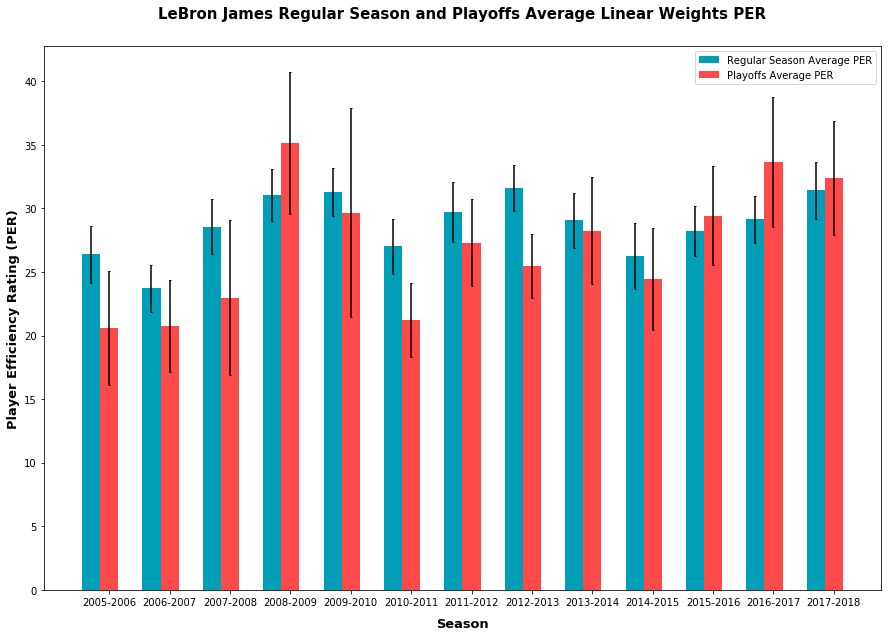

In [239]:
import matplotlib.pyplot as plt
from scipy.misc import imread

x = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
x2 = [i - 0.3 for i in x]
ax = plt.subplot(111)

fig = plt.gcf()
fig.set_size_inches(15, 10)
#ax.bar(x - 0.2, regular_season_PER_means)
rec1 = ax.bar(x2, regular_season_PER_means, width=0.3, yerr=ci_regular_season, capsize=1, label='Regular Season Average PER', color='#009FB7')
rec2 = ax.bar(x, player_PER_means, width=0.3, yerr=ci_playoffs, capsize=1, label='Playoffs Average PER', color='#FE4A49')

labels=[]
for i in range(13):
    s = str(x[i])
    s = s + '-' + str(x[i]+1)
    labels.append(s)

plt.xticks(x)
ax.set_xticklabels(labels)
title = ax.title
title.set_position([.5, 1.04])
plt.xlabel('Season', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Player Efficiency Rating (PER)', fontsize=13, fontweight='bold')
plt.title('LeBron James Regular Season and Playoffs Average Linear Weights PER', fontsize=15, fontweight='bold')
plt.legend()
plt.show()

In [192]:
labels=[]
for i in range(13):
    s = str(x[i])
    s = s + '-' + str(x[i]+1)
    labels.append(s)

In [193]:
labels

['2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018']